# Fine-Tuning BERT for Question Answering
<b>Extractive Question Answering</b> is the task of extracting an answer from a text given a question. An example of a question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune a model on a SQuAD task, you may leverage the run_qa.py and run_tf_squad.py scripts.

## Installations

In [ ]:
!pip install --quiet transformers
!pip install --quiet datasets

## Imports

In [ ]:
import torch
from transformers import pipeline

## Model

In [ ]:
from transformers import BertForQuestionAnswering # This is the BERT model used for question answering

# BERT model already finetuned for question answering
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

## Tokenizing & Preprocessing

In [ ]:
from transformers import BertTokenizer

# BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

### Feed in a sample (C, Q)

In [ ]:
# BERT takes in as input the question and context so that it can extract the answer from the context
# We're gonna use the abstract from the "Improving Machine Reading Comprehension with Single-choice Decision and Transfer Learning" paper 
# by Jiang et al. as our context and we will ask questions pertaining to the abstract!
question = "What is your purpose?"
context = "We introduce a new language representation model called BERT, which stands for \
Bidirectional Encoder Representations from \
Transformers. Unlike recent language representation models (Peters et al., 2018a; Radford et al., 2018), BERT is designed to pretrain deep bidirectional representations from \
unlabeled text by jointly conditioning on both \
left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer \
to create state-of-the-art models for a wide \
range of tasks, such as question answering and \
language inference, without substantial taskspecific architecture modifications."

In [ ]:
# Remember that we feed in the context AND question concatenated together into BERT with a [SEP] token separating them
inputs = tokenizer(question, context, add_special_tokens=True, return_tensors="pt")
input_ids = inputs["input_ids"].tolist()[0]

print(f'The input has a total of {len(input_ids)}')

The input has a total of 143


### Display Tokens and their Embeddings

In [ ]:
# We can display the encodings for each token
tokens = tokenizer.convert_ids_to_tokens(input_ids) # reverts embeddings back to their token text representation

for token, id in zip(tokens, input_ids):

  if id == tokenizer.sep_token_id:
    print('')

  print(f'({token}, {id})')

  if id == tokenizer.sep_token_id:
    print('')

([CLS], 101)
(what, 2054)
(is, 2003)
(your, 2115)
(purpose, 3800)
(?, 1029)

([SEP], 102)

(we, 2057)
(introduce, 8970)
(a, 1037)
(new, 2047)
(language, 2653)
(representation, 6630)
(model, 2944)
(called, 2170)
(bert, 14324)
(,, 1010)
(which, 2029)
(stands, 4832)
(for, 2005)
(bid, 7226)
(##ire, 7442)
(##ction, 7542)
(##al, 2389)
(en, 4372)
(##code, 16044)
(##r, 2099)
(representations, 15066)
(from, 2013)
(transformers, 19081)
(., 1012)
(unlike, 4406)
(recent, 3522)
(language, 2653)
(representation, 6630)
(models, 4275)
((, 1006)
(peters, 12420)
(et, 3802)
(al, 2632)
(., 1012)
(,, 1010)
(2018, 2760)
(##a, 2050)
(;, 1025)
(ra, 10958)
(##df, 20952)
(##ord, 8551)
(et, 3802)
(al, 2632)
(., 1012)
(,, 1010)
(2018, 2760)
(), 1007)
(,, 1010)
(bert, 14324)
(is, 2003)
(designed, 2881)
(to, 2000)
(pre, 3653)
(##train, 23654)
(deep, 2784)
(bid, 7226)
(##ire, 7442)
(##ction, 7542)
(##al, 2389)
(representations, 15066)
(from, 2013)
(un, 4895)
(##lab, 20470)
(##ele, 12260)
(##d, 2094)
(text, 3793)
(by

## Run our model

In [ ]:
outputs = model(**inputs)

# softmax probabilities of start and end tokens
answer_start_scores = outputs.start_logits
answer_end_scores = outputs.end_logits

answer_start = torch.argmax(answer_start_scores) # get the start token with highest probability
answer_end = torch.argmax(answer_end_scores) + 1 # get the end token with highest probability

# construct the whole sequence of text from the start token to the end token
answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end])) # This is our answer!!!

print(f'Question: {question}')
print(f'Answer: {answer}')

Question: What is your purpose?
Answer: to pretrain deep bidirectional representations from unlabeled text


## Visualizing the Scores!

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

plt.rcParams["figure.figsize"] = (16,8)

In [ ]:
# Convert the start and end scores tensors to numpy arrays
start_scores = answer_start_scores.detach().numpy().flatten()
end_scores = answer_end_scores.detach().numpy().flatten()

token_labels = []
for (i, token) in enumerate(tokens):
  token_labels.append('{:} - {:>2}'.format(token, i))

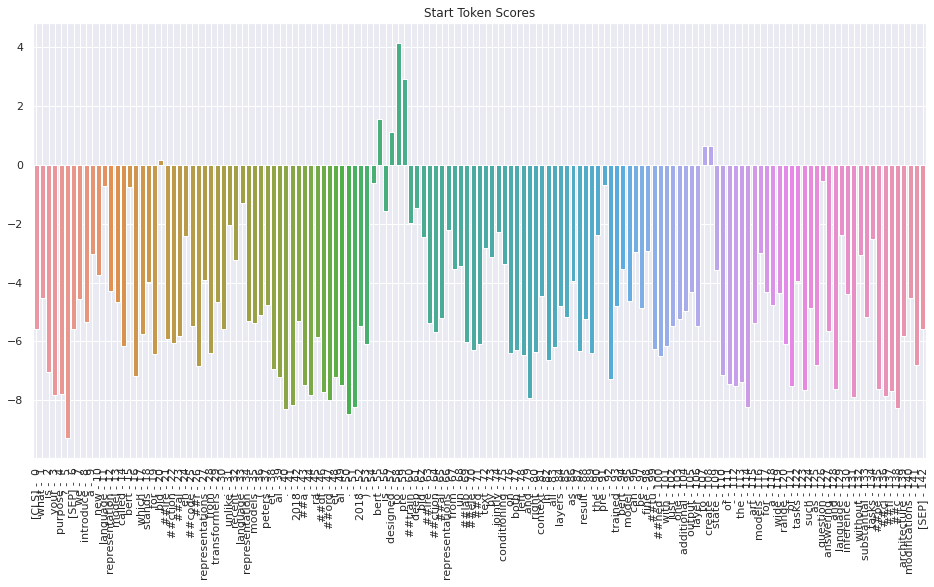

In [ ]:
# Create bargraph showing the start token score for all tokens in input text
ax = sns.barplot(x=token_labels, y=start_scores, ci=None)

# Make x label vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

# Vertical grid
ax.grid(True)

plt.title('Start Token Scores')

plt.show()

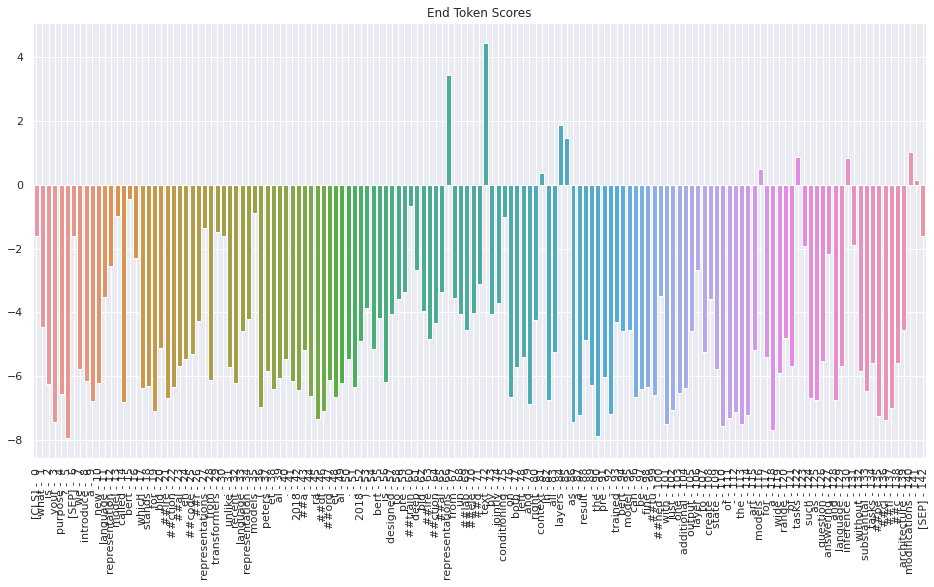

In [ ]:
# Create bargraph showing the start token score for all tokens in input text
ax = sns.barplot(x=token_labels, y=end_scores, ci=None)

# Make x label vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

# Vertical grid
ax.grid(True)

plt.title('End Token Scores')

plt.show()